# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [7]:
# import libraries needed
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [3]:
# import data and set in correct ts format
data = pd.read_csv('exch_rates.csv')
data.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [5]:
# set Frequency as the index in proper date datatype
data['Frequency'] = pd.to_datetime(data['Frequency'])
data.set_index('Frequency', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


In [6]:
# just to check
data.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20',
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2018-11-26'],
              dtype='datetime64[ns]', name='Frequency', length=6905, freq=None)

Plot the three exchange rates in one plot

Text(0, 0.5, 'XR Rate')

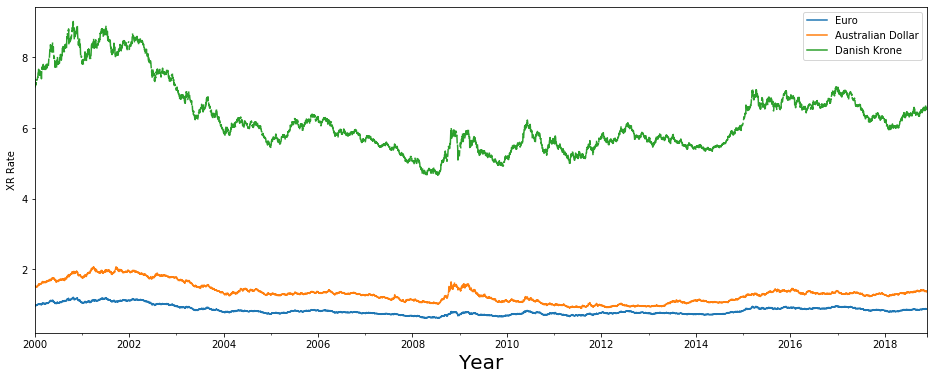

In [9]:
# plot the three exchange rates
data.plot(figsize=(16,6))
plt.xlabel('Year', fontsize=20)
plt.ylabel('XR Rate')

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [10]:
# your code here
data.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


In [11]:
# these all seem to have strong correlations with each other, 
# even without detrending them yet. The highest correlations are the
#Euro and the Danish Krone - almost perfectly correlated (which makes sense), 
#followed by the Euro and the Australian Dollar


### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c18afc208>,
      dtype=object)

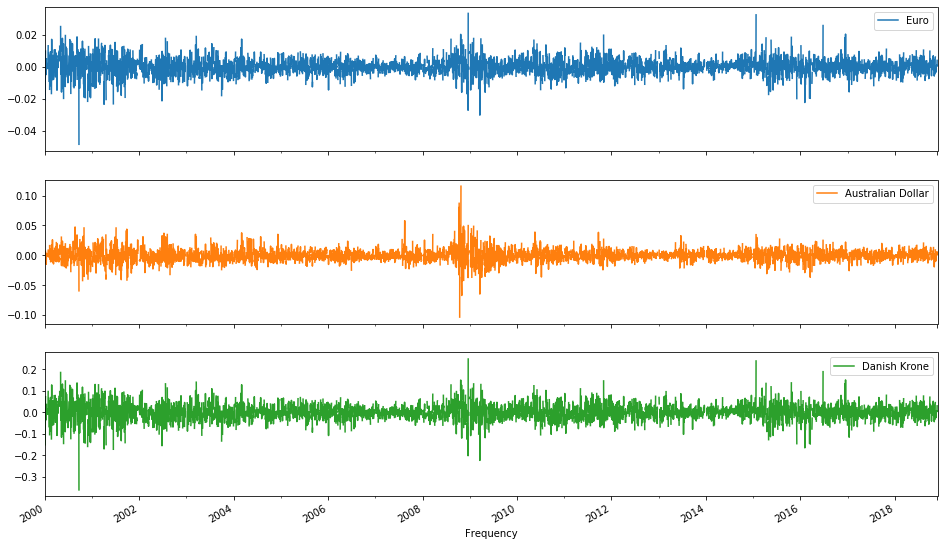

In [13]:
# your code here
data_diff = data.diff(periods=1)
data_diff.plot(figsize=(16, 10), subplots=True, legend=True)

In [14]:
# your code here
data_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


In [16]:
# your code here
# Here we can see that while the Krone stays basically perfectly
# correlated with the Euro (Krone is pegged to the Euro), the correlation
# between the Euro and Aus dollar has diminished greatly. This confirms
# that the high corr was a result of seasonality.

### Explain what's going on

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [19]:
# extract Euro Data
eur = data[['Euro']]

In [20]:
# create a lag 1 autocorr
eur_shift_1 = eur.shift(periods=1)
eur_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


          Euro      Euro
Euro  1.000000  0.999146
Euro  0.999146  1.000000


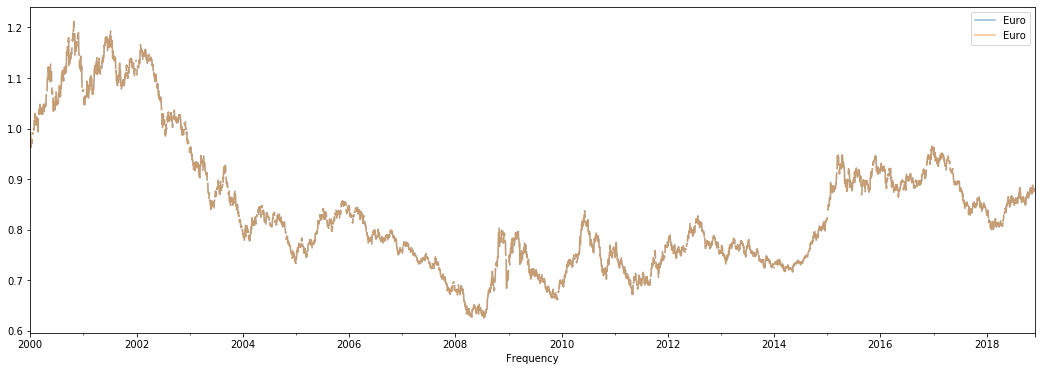

In [26]:
# look at the corr coef
lag_1 = pd.concat([eur_shift_1, eur], axis=1)
print(lag_1.corr())

#plot
lag_1.plot(figsize=(18,6), alpha=0.5)
plt.show()

Repeat this, but for a "lag 50 autocorrelation"

          Euro      Euro
Euro  1.000000  0.968321
Euro  0.968321  1.000000


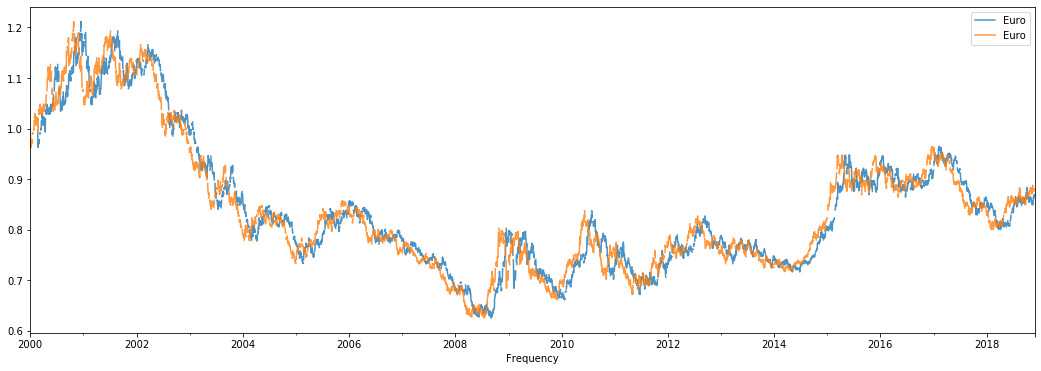

In [28]:
# your code here
eur_shift_50 = eur.shift(periods=50)
lag_50 = pd.concat([eur_shift_50, eur], axis=1)
print(lag_50.corr())

lag_50.plot(figsize=(18,6), alpha=0.8)

In [29]:
# your code here
eur_shift_50.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN


In [30]:
# Autocorrelation is very high, even with a lag as big as 50.
# Considering that these ar random walk series, this is not so 
# so surprising because random walk series are highly recursive, 
# as each value depends heavily on the previous one. In other words,
# tomorrow's currency exchange rate will be strongly influenced by 
# today's exchange rate.

### What's your conclusion here?

Knowing this, let's plot the ACF now.

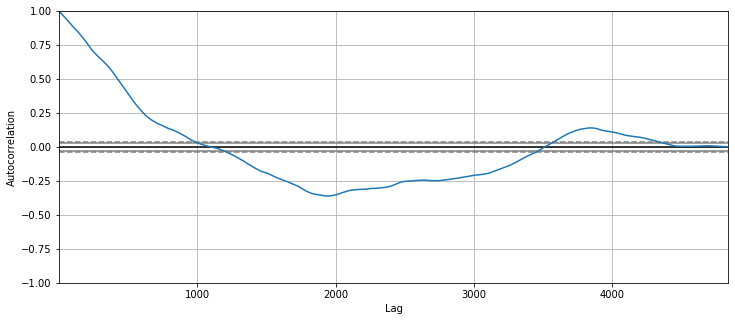

In [34]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna()); #drop nulls for plot

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

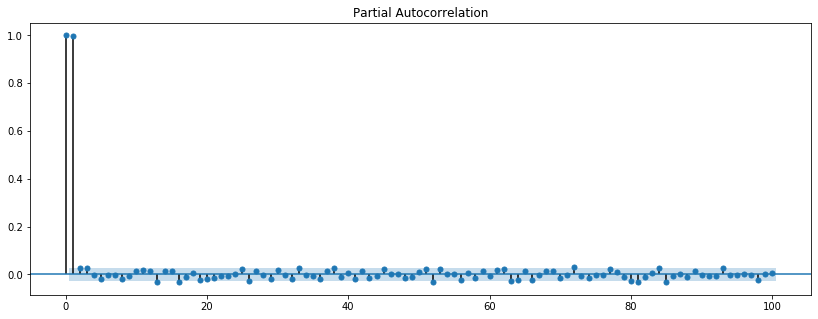

In [37]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_pacf(eur.dropna(), lags=100, method = 'ywm');

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [38]:
# your code here
df = pd.read_csv('passengers.csv')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [41]:
# your code here
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

KeyError: 'Month'

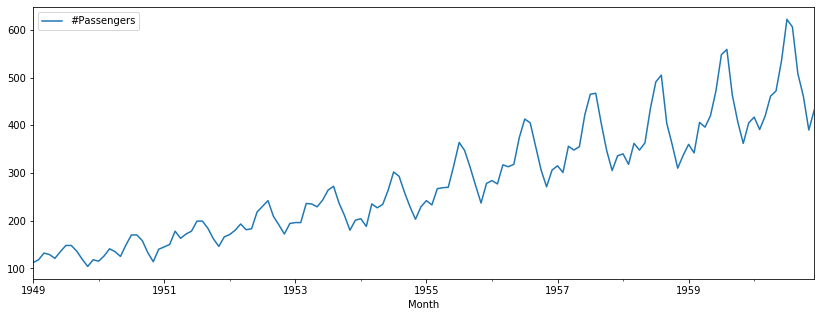

In [42]:
df.plot()

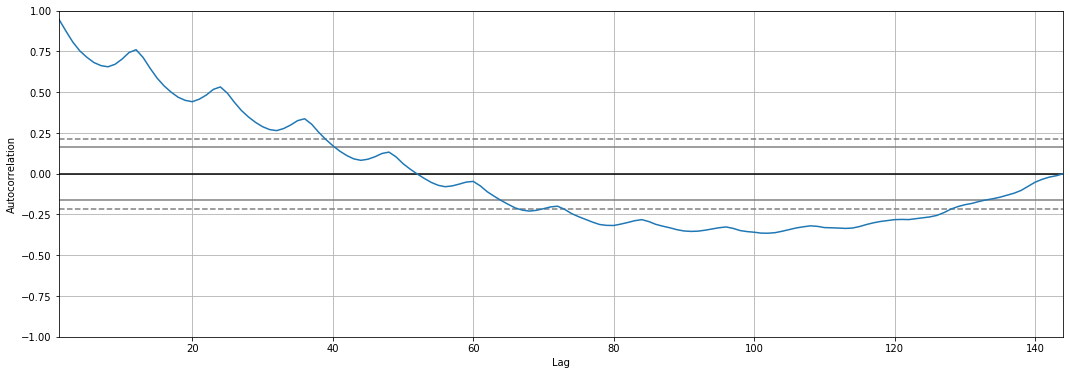

In [44]:
plt.figure(figsize=(18,6))
pd.plotting.autocorrelation_plot(df);

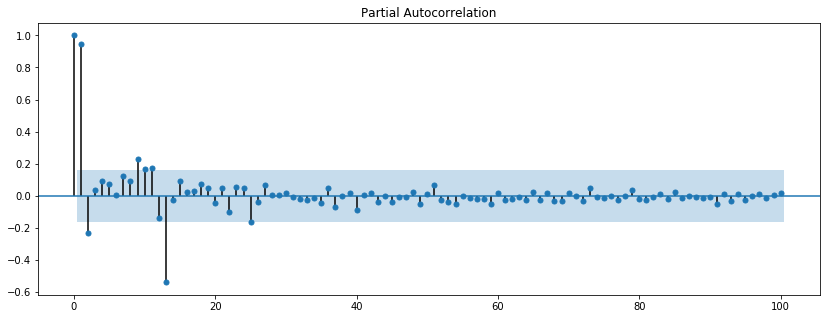

In [47]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(df.dropna(), lags=100, method='ywm');

In [49]:
# Differenced data
df_diff = df.diff(periods=1)

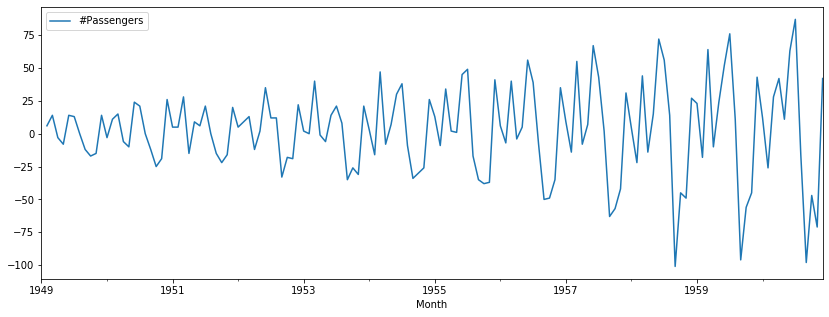

In [52]:
df_diff.plot()

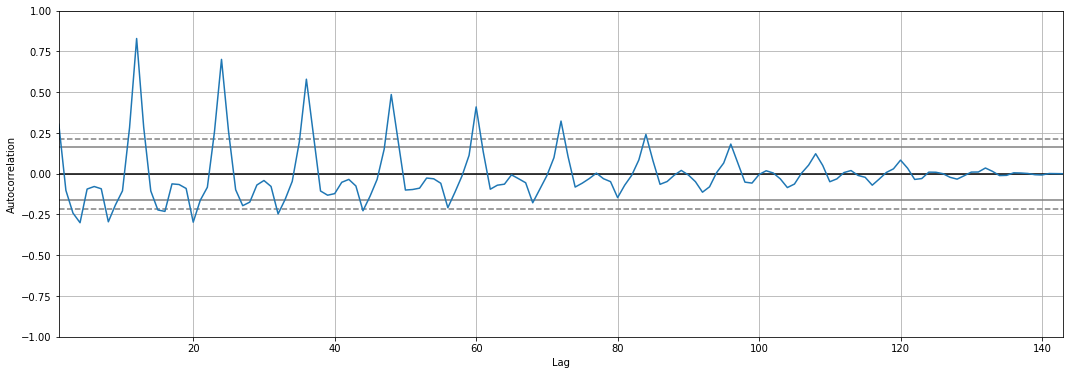

In [50]:
# your code here
plt.figure(figsize=(18,6))
pd.plotting.autocorrelation_plot(df_diff.dropna());

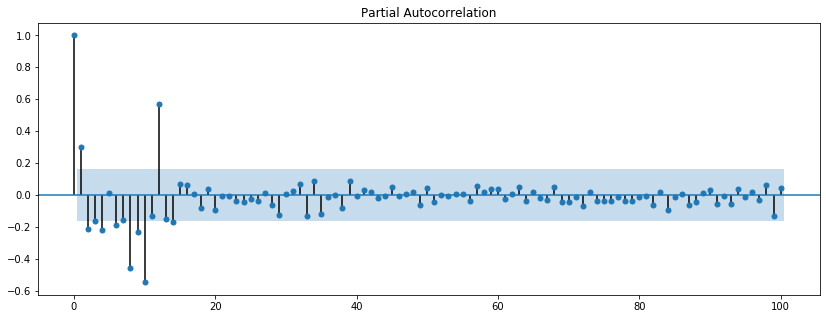

In [51]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_pacf(df_diff.dropna(), lags=100, method='ywm');

### Your conclusion here

In [53]:
# The differencing allows us to see the seasonality much more clearly
# The PACF appears to have a high positive correlation at 12 months,
# but after that the correlation drops significantly.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [54]:
# your code here
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


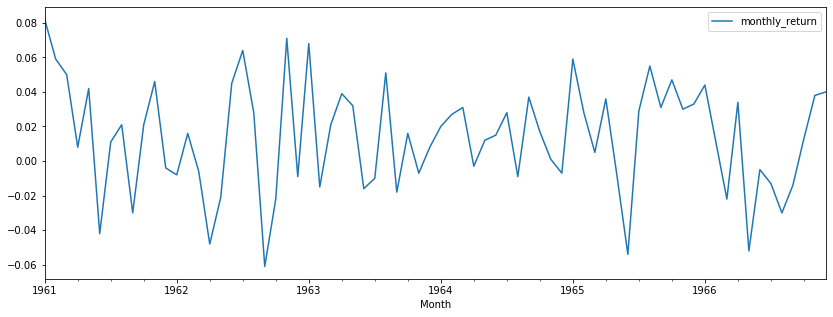

In [55]:
# your code here
nyse.Month = pd.to_datetime(nyse.Month)
nyse.set_index('Month', inplace=True)
nyse.plot()

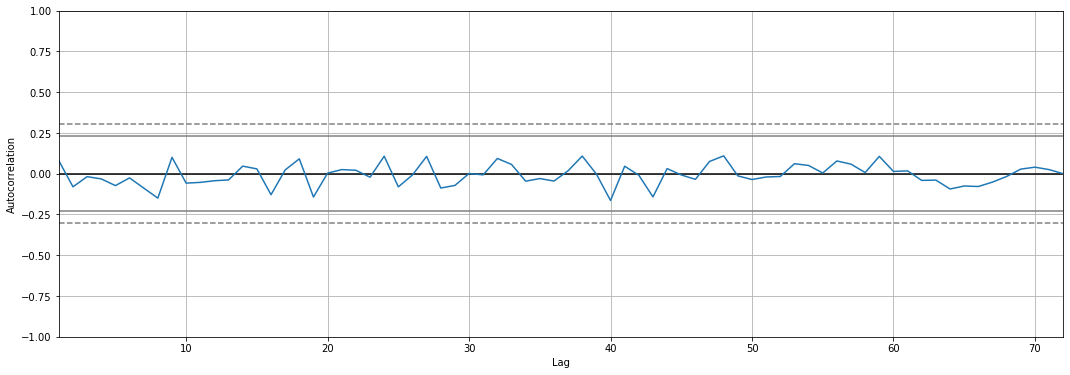

In [56]:
# your code here
plt.figure(figsize=(18,6))
pd.plotting.autocorrelation_plot(nyse.dropna());

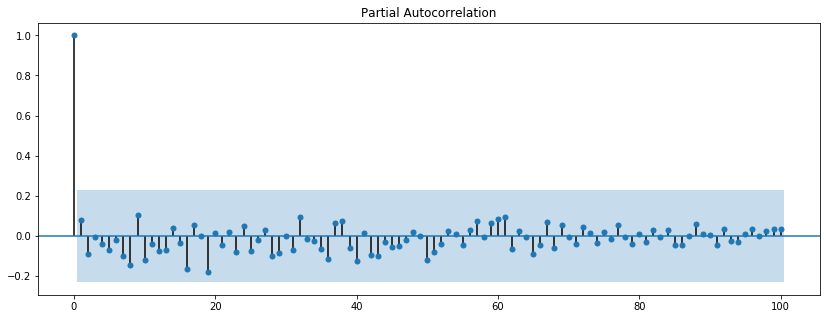

In [57]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(nyse.dropna(), lags = 100, method = 'ywm');

## Your conclusion here

In [ ]:
# There appears to be no real autocorrelation or partial autocorr at any lag
# this makes sense given that the ny



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!